<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction/CCRPM_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator, FuncFormatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import tf_keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Installing the Relevant Libraries**

In [ ]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading the Dataset**

In [ ]:
# Loading the dataset with the proper delimiter (semicolon)
data = pd.read_excel('/content/drive/MyDrive/Comprehensive_Chemical_Risk_Prediction_Model/IMPORTATION DETAILS.xlsx')

In [ ]:
# Displaying the first few rows of the data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03
0,TransWorld Chemicals,2023,JUNE,280110,FRANCE,Kg.,179640,13387839,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine","Fluorine, chlorine, bromine and iodine"
1,Horizon Industrial Supply,2023,SEPTEMBER,283719,U.K.,Kg.,53784,36871839,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.","Cyanides, cyanide oxides and complex cyanides."
2,Greenfield Enterprises,2023,JULY,284700,SOUTH KOREA,Kg.,77028,35228981,Inorganic chemicals; Organic or inorganic comp...,"Hydrogen peroxide, whether or not solidified w...","Hydrogen peroxide, whether or not solidified w..."
3,Redwood Chemical Co.,2023,DECEMBER,280110,AUSTRIA,Kg.,137434,23393445,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine","Fluorine, chlorine, bromine and iodine"
4,Redwood Chemical Co.,2023,APRIL,280800,SPAIN,Kg.,116881,11490994,Inorganic chemicals; Organic or inorganic comp...,Nitric acid; sulphonitric acids.,Nitric acid; sulphonitric acids.


# **Exploratary Data Analysis**

In [ ]:
# Displaying information
print("Displaying data information")
data.info()

Displaying data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IMPORTER        10000 non-null  object
 1   YEAR            10000 non-null  int64 
 2   MONTH           10000 non-null  object
 3   HSCODE          10000 non-null  int64 
 4   COUNTRY         10000 non-null  object
 5   UNIT            10000 non-null  object
 6   QUANTITY        10000 non-null  int64 
 7   VALUE_RS        10000 non-null  int64 
 8   DESCRIPTION_01  10000 non-null  object
 9   DESCRIPTION_02  10000 non-null  object
 10  DESCRIPTION_03  10000 non-null  object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB


### **Identifying Categorical and Numerical Columns**

In [ ]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [ ]:
# Displaying the categorical features
print("Categorical Features:")
print(categorical_cols)

Categorical Features:
Index(['IMPORTER', 'MONTH', 'COUNTRY', 'UNIT', 'DESCRIPTION_01',
       'DESCRIPTION_02', 'DESCRIPTION_03'],
      dtype='object')


**Unique Values and Their Counts Relevant to Each Categorical Column**

In [ ]:
# Displaying the unique values and their counts relevant to each categorical column
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(), "\n")


Column: IMPORTER
IMPORTER
AquaPro Solutions            1061
Prime Logistics Group        1037
Horizon Industrial Supply    1033
GlobalTech Imports           1012
IronGate Imports Ltd.        1006
Greenfield Enterprises        993
Nova International Trade      982
TransWorld Chemicals          969
Redwood Chemical Co.          969
EcoTrade Ltd.                 938
Name: count, dtype: int64 


Column: MONTH
MONTH
FEBRUARY     873
SEPTEMBER    867
APRIL        859
JULY         849
DECEMBER     844
NOVEMBER     837
OCTOBER      824
MAY          821
AUGUST       813
JUNE         808
MARCH        804
JANUARY      801
Name: count, dtype: int64 


Column: COUNTRY
COUNTRY
BANGLADESH     667
DENMARK        666
CHINA          654
PAKISTAN       652
U.K.           649
SINGAPORE      632
FRANCE         630
INDIA          627
AUSTRIA        618
MALAYSIA       617
SOUTH KOREA    613
JAPAN          613
SPAIN          607
U.S.A          607
GERMANY        600
THAILAND       548
Name: count, dtype: int

## **Numerical Features**

In [ ]:
# Numerical Features
print("Numerical Features:")
print(numerical_cols)

Numerical Features:
Index(['YEAR', 'HSCODE', 'QUANTITY', 'VALUE_RS'], dtype='object')


**Unique Values and Their Count Relevant to Each Numerical Column**

In [ ]:
# Unique values and their counts relevant to each numerical columns
for col in numerical_cols:
    print(f"\nColumn: {col}")
    print(data[col].value_counts(), "\n")


Column: YEAR
YEAR
2023    10000
Name: count, dtype: int64 


Column: HSCODE
HSCODE
280110    2071
284700    2024
283719    1992
280800    1973
283711    1940
Name: count, dtype: int64 


Column: QUANTITY
QUANTITY
135913    3
101430    3
57809     3
63661     3
142941    3
         ..
149805    1
110341    1
41875     1
147926    1
43588     1
Name: count, Length: 9726, dtype: int64 


Column: VALUE_RS
VALUE_RS
17508956    2
13387839    1
3354554     1
31193790    1
30438797    1
           ..
15832575    1
49712963    1
39720647    1
39220987    1
16876031    1
Name: count, Length: 9999, dtype: int64 



### **Defining the Target Variable**

In [ ]:
# Defining the target variable by combining three columns

# Defining the risk thresholds
high_quantity_threshold = 100000
hazardous_chemicals = [
    "Fluorine, chlorine, bromine and iodine",
    "Cyanides, cyanide oxides and complex cyanides.",
    "Cyanides and cyanide oxides : Of sodium"
]

# Function to classify risk
def classify_risk(row):
    quantity = row['QUANTITY']
    description = row['DESCRIPTION_03']

    if quantity > high_quantity_threshold and description in hazardous_chemicals:
        return "High Risk"
    elif quantity > high_quantity_threshold:
        return "Moderate Risk"
    else:
        return "Low Risk"

# Applying the function to create a new column
data['Risk_Level'] = data.apply(classify_risk, axis=1)

# Displaying the dataset
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03,Risk_Level
0,TransWorld Chemicals,2023,JUNE,280110,FRANCE,Kg.,179640,13387839,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine","Fluorine, chlorine, bromine and iodine",High Risk
1,Horizon Industrial Supply,2023,SEPTEMBER,283719,U.K.,Kg.,53784,36871839,Inorganic chemicals; Organic or inorganic comp...,"Cyanides, cyanide oxides and complex cyanides.","Cyanides, cyanide oxides and complex cyanides.",Low Risk
2,Greenfield Enterprises,2023,JULY,284700,SOUTH KOREA,Kg.,77028,35228981,Inorganic chemicals; Organic or inorganic comp...,"Hydrogen peroxide, whether or not solidified w...","Hydrogen peroxide, whether or not solidified w...",Low Risk
3,Redwood Chemical Co.,2023,DECEMBER,280110,AUSTRIA,Kg.,137434,23393445,Inorganic chemicals; Organic or inorganic comp...,"Fluorine, chlorine, bromine and iodine","Fluorine, chlorine, bromine and iodine",High Risk
4,Redwood Chemical Co.,2023,APRIL,280800,SPAIN,Kg.,116881,11490994,Inorganic chemicals; Organic or inorganic comp...,Nitric acid; sulphonitric acids.,Nitric acid; sulphonitric acids.,Moderate Risk


### **Visualizing the Target Column**

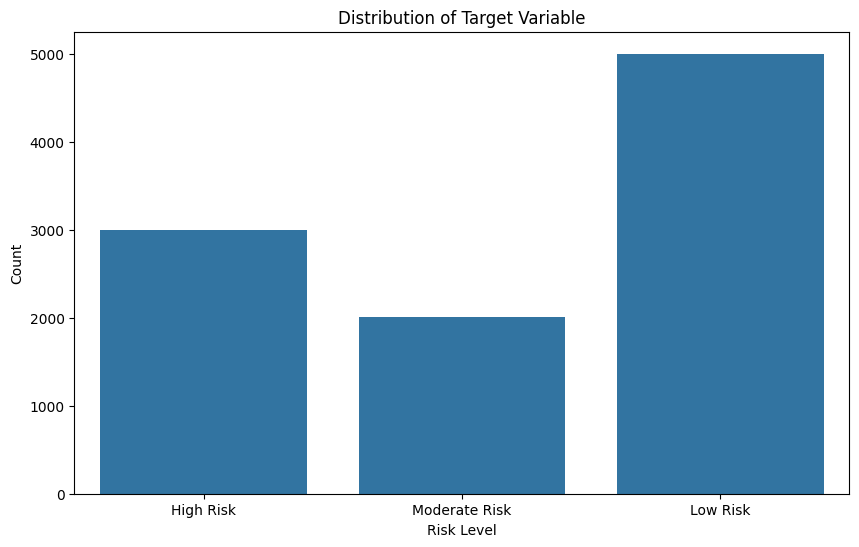

In [ ]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Risk_Level', order=['High Risk', 'Moderate Risk', 'Low Risk'])
plt.xticks(rotation=0)  # Ensures the labels are horizontal
plt.title('Distribution of Target Variable')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

### **Visualizing the Correlation Heatmap**

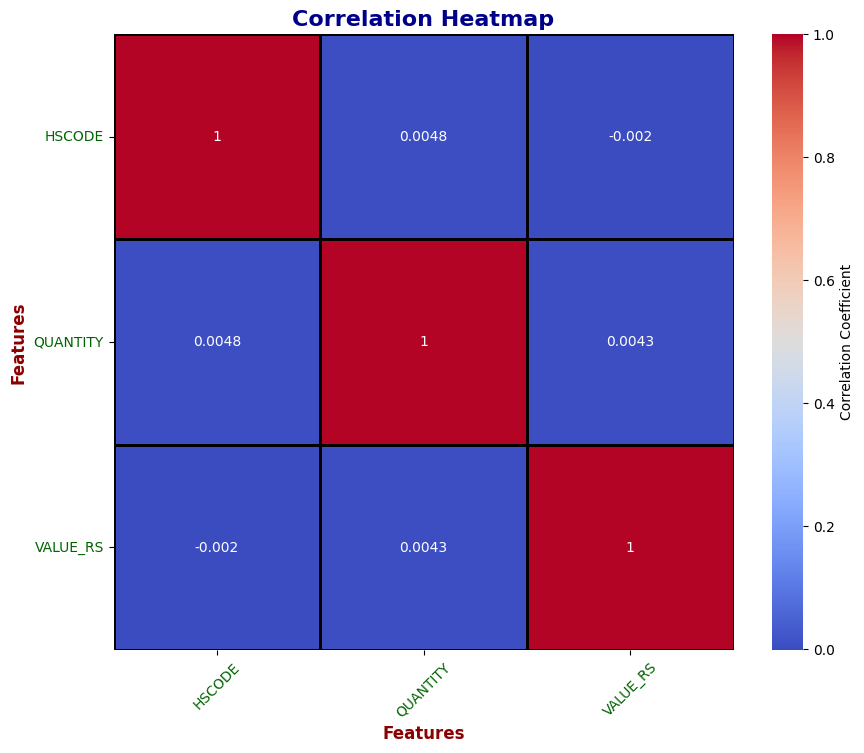

In [ ]:
# List of numerical columns
numerical_distribution = ['HSCODE', 'QUANTITY', 'VALUE_RS']

# Visualizing the correlation heatmap for the numerical columns
plt.figure(figsize=(10, 8))

# The Correlation Heatmap
sns.heatmap(
    data[numerical_distribution].corr(),
    annot=True,
    cmap='coolwarm',
    cbar_kws={'label': 'Correlation Coefficient'},
    linewidths=1,
    linecolor='black'
)

# Adding title and labels with formatting
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Features', fontsize=12, fontweight='bold', color='darkred')
plt.ylabel('Features', fontsize=12, fontweight='bold', color='darkred')

# Customizing tick labels for better readability
plt.xticks(fontsize=10, rotation=45, color='darkgreen')
plt.yticks(fontsize=10, rotation=0, color='darkgreen')

# Display the heatmap
plt.show()

### **Visualizing the Distribution of the Categorical Columns**

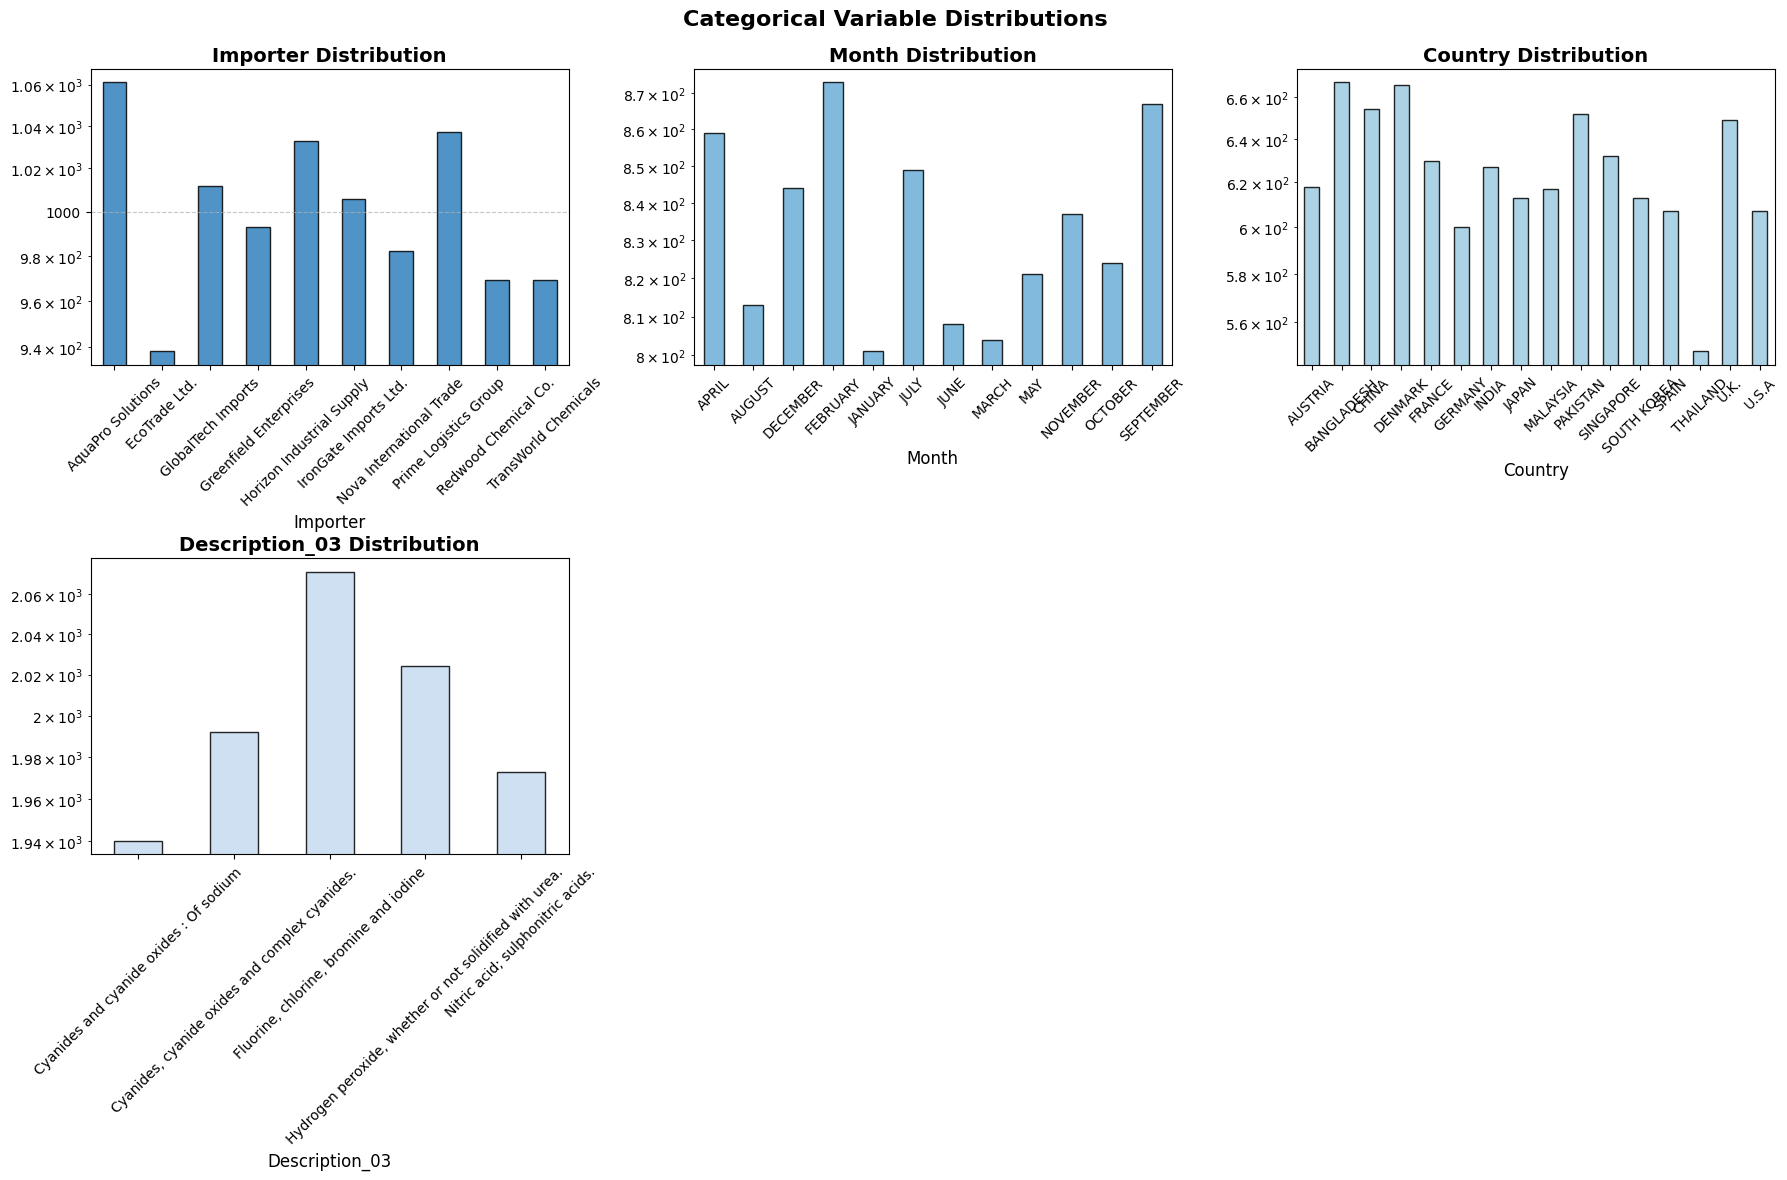

In [ ]:
# Defining a list to store the categorical variables
categorical_distribution = ['IMPORTER', 'MONTH', 'COUNTRY', 'DESCRIPTION_03']

# Defining grid dimensions
n_cols = 3
n_rows = (len(categorical_distribution) + n_cols - 1) // n_cols

# Creating subplots with improved styling
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

# Generating a color palette using the new colormap approach
colors = plt.cm.tab20c(range(len(categorical_distribution)))

# Plotting each categorical column
for idx, column in enumerate(categorical_distribution):
    data[column].value_counts().sort_index().plot(kind='bar', ax=axes[idx], color=colors[idx % len(colors)],
                                                  alpha=0.85, edgecolor='black')
    axes[idx].set_title(f'{column.capitalize()} Distribution', fontsize=14, weight='bold')
    axes[idx].set_xlabel(column.capitalize(), fontsize=12)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].tick_params(axis='y', left=True, labelleft=True)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

    # Applying log scale to y-axis
    axes[idx].set_yscale('log')

    # Customizing y-axis ticks for log scale
    axes[idx].yaxis.set_major_locator(LogLocator(base=10.0))
    axes[idx].yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{int(y)}'))

# Turn off unused axes
for ax in axes[len(categorical_distribution):]:
    ax.axis('off')

# Displaying the plot
plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle('Categorical Variable Distributions', fontsize=16, weight='bold')

plt.show()


### **Visualization of the Distribution of the Numerical Columns**

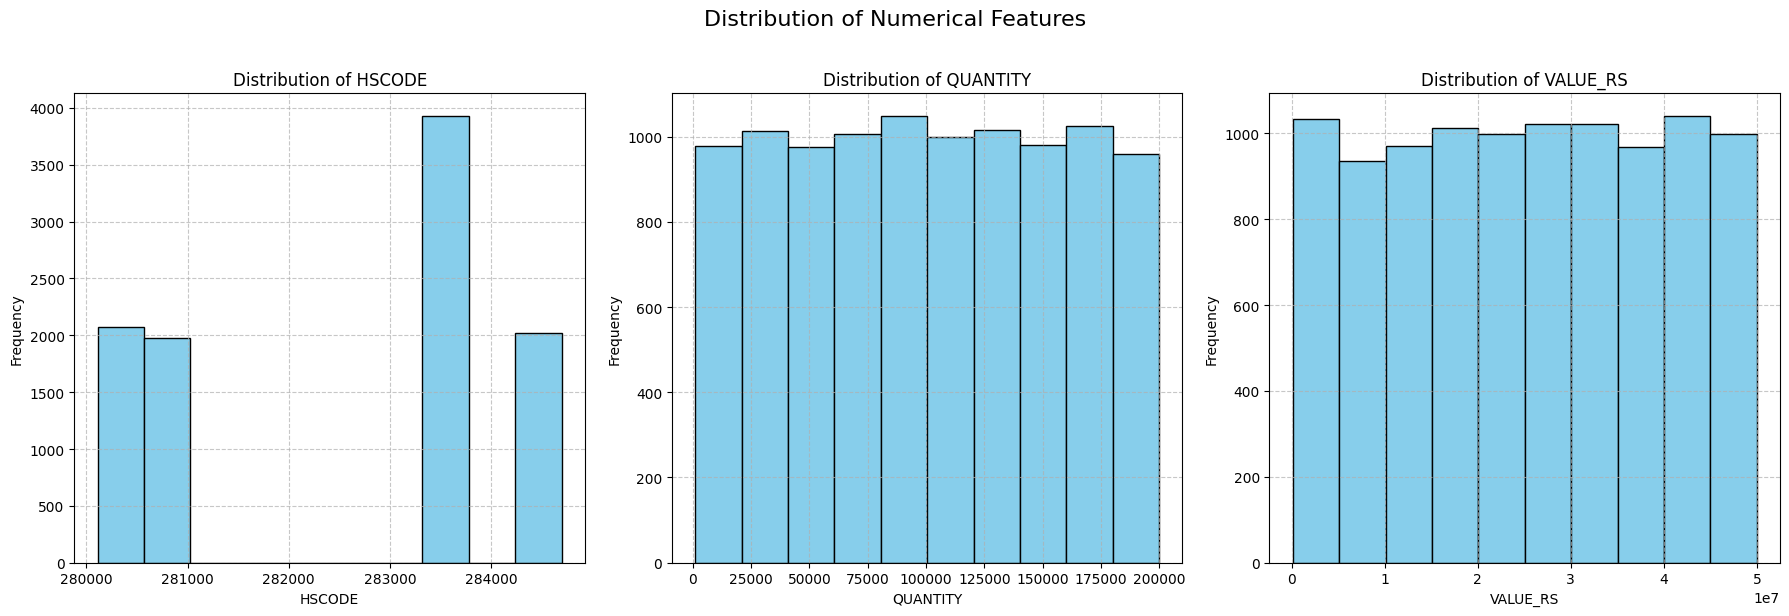

In [ ]:
# List of numerical columns
numerical_distribution = ['HSCODE', 'QUANTITY', 'VALUE_RS']

# Creating a subplots for better organization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plotting each histogram in its subplot
for i, column in enumerate(numerical_distribution):
    axes[i].hist(data[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Setting a suptitle for the entire figure
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)

# Adjusting spacing to avoid overlap
fig.tight_layout()

# Displaying the plots
plt.show()

## **Outlier Analysis**

In [ ]:
# Assuming your dataset is named 'data' and contains numerical columns
numerical_cols = ['HSCODE', 'QUANTITY', 'VALUE_RS']

# Creating an empty dictionary to store the outlier information
outlier_info_zscore = {}

# Defining the Z-score threshold
threshold = 3

for column in numerical_cols:
    # Calculate the Z-scores for each value in the column
    z_scores = np.abs(stats.zscore(data[column]))

    # Detecting outliers (values with Z-score > threshold)
    outliers = data[z_scores > threshold]

    # Storing the outlier information
    outlier_info_zscore[column] = {
        'Outliers': outliers.shape[0],
        'Threshold': threshold
    }

    # Displaying the information for each column
    print(f"Column: {column}")
    print(f"  Outliers: {outlier_info_zscore[column]['Outliers']}, "
          f"Threshold: {outlier_info_zscore[column]['Threshold']}")
    print(" ")

Column: HSCODE
  Outliers: 0, Threshold: 3
 
Column: QUANTITY
  Outliers: 0, Threshold: 3
 
Column: VALUE_RS
  Outliers: 0, Threshold: 3
 


# **Data Preprocessing**

In [ ]:
# Step 1: Removing whitespaces from the object type columns
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [ ]:
# Step 2: Removing duplicate values
print(f"Initial dataset shape: {data.shape}")
data = data.drop_duplicates()
print(f"Shape after removing duplicates: {data.shape}")

Initial dataset shape: (10000, 12)
Shape after removing duplicates: (10000, 12)


## **Handling Missing Values**

### **Handling Missing Values in the Categorical Columns**

In [ ]:
# Step 3: Handling missing values in the Categorical Columns

# Checking for missing values in the Categorical Columns
for column in categorical_cols:
    print(f"Missing values for column {column}: {data[column].isnull().sum()}")

Missing values for column IMPORTER: 0
Missing values for column MONTH: 0
Missing values for column COUNTRY: 0
Missing values for column UNIT: 0
Missing values for column DESCRIPTION_01: 0
Missing values for column DESCRIPTION_02: 0
Missing values for column DESCRIPTION_03: 0


### **Handling Missing Values in the Numerical Columns**

In [ ]:
# Step 4: Handling missing values in the Numerical Columns

# Checking for missing values in the Numerical Columns
for column in numerical_cols:
    print(f"Missing values for column {column}: {data[column].isnull().sum()}")

Missing values for column HSCODE: 0
Missing values for column QUANTITY: 0
Missing values for column VALUE_RS: 0


## **Data Encoding**

**All categorical columns are encoded using the label encoding since the categorical data contained within the dataset are ordinal**

In [ ]:
# Encoding the categorical columns

# Defining the columns to be encoded
encoding_cols = ['IMPORTER', 'MONTH', 'COUNTRY', 'DESCRIPTION_03', 'Risk_Level']

label_encoder = LabelEncoder()
for column in encoding_cols:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
# Displaying the encoded data
data.head()

,IMPORTER,YEAR,MONTH,HSCODE,COUNTRY,UNIT,QUANTITY,VALUE_RS,DESCRIPTION_01,DESCRIPTION_02,DESCRIPTION_03,Risk_Level
0,9,2023,6,280110,4,0,179640,13387839,0,2,2,0
1,4,2023,11,283719,14,0,53784,36871839,0,1,1,1
2,3,2023,5,284700,11,0,77028,35228981,0,3,3,1
3,8,2023,2,280110,0,0,137434,23393445,0,2,2,0
4,8,2023,0,280800,12,0,116881,11490994,0,4,4,2


In [ ]:
# Step 5: Scaling the Numerical Features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])


In [ ]:
# Step 6: Handling the columns with low correlation coefficients with the target column
correlation_with_target = data.corr()['Risk_Level'].sort_values(ascending=False)

# Print the correlation values
print("Correlation with Risk_Level:")
print(correlation_with_target)

Correlation with Risk_Level:
Risk_Level        1.000000
DESCRIPTION_02    0.601452
DESCRIPTION_03    0.601452
HSCODE            0.058266
IMPORTER          0.004929
VALUE_RS         -0.010299
MONTH            -0.013145
COUNTRY          -0.017799
QUANTITY         -0.126358
YEAR                   NaN
UNIT                   NaN
DESCRIPTION_01         NaN
Name: Risk_Level, dtype: float64


In [ ]:
# Dropping the columns with no correlation (Constant Columns)
columns_to_drop = ['YEAR', 'UNIT', 'DESCRIPTION_01']
data = data.drop(columns=columns_to_drop)


In [ ]:
# Dropping the columns with low correlation
columns_to_drop = ['VALUE_RS', 'COUNTRY', 'MONTH', 'IMPORTER']
data = data.drop(columns=columns_to_drop)

In [ ]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   HSCODE          10000 non-null  int64
 1   QUANTITY        10000 non-null  int64
 2   DESCRIPTION_02  10000 non-null  int64
 3   DESCRIPTION_03  10000 non-null  int64
 4   Risk_Level      10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [ ]:
# Step 7: Splitting Features and the Target Variable
X = data.drop(columns=['Risk_Level'])
y = data['Risk_Level']

In [ ]:
# Step 8: Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Analyzing the distribution of the y train dataset
y_train.value_counts(normalize=True)

,proportion
Risk_Level,
1,0.500125
0,0.302000
2,0.197875


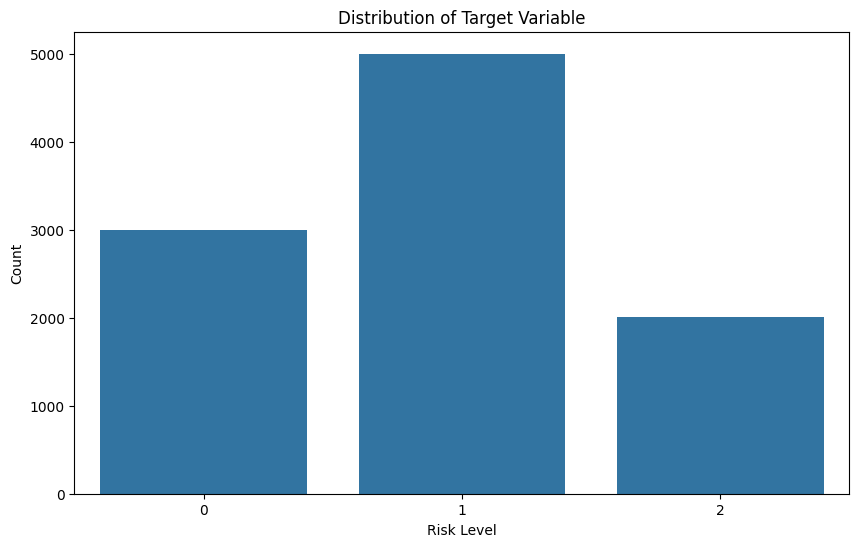

In [ ]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Risk_Level')
plt.xticks(rotation=0)
plt.title('Distribution of Target Variable')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

In [ ]:
# Displaying the dataset shape
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 4)
Shape of X_test: (2000, 4)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [ ]:
# Displaying the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   HSCODE          10000 non-null  int64
 1   QUANTITY        10000 non-null  int64
 2   DESCRIPTION_02  10000 non-null  int64
 3   DESCRIPTION_03  10000 non-null  int64
 4   Risk_Level      10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


In [ ]:
# Suppressing the FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handling imbalanced dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset size:", X.shape)
print("Resampled dataset size:", X_resampled.shape)

Original dataset size: (10000, 4)
Resampled dataset size: (14994, 4)


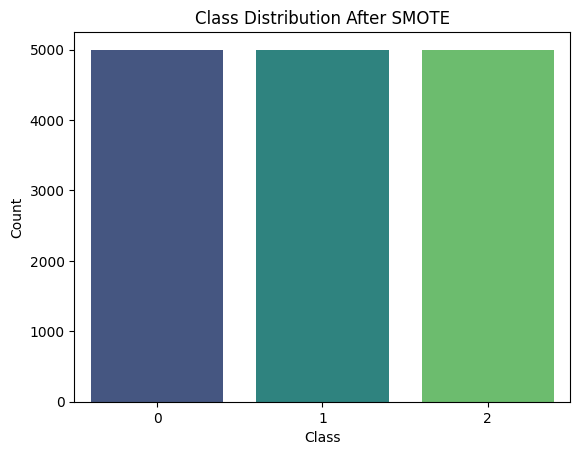

In [ ]:
# Plotting class distribution after SMOTE
sns.countplot(x=y_resampled, palette="viridis")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# **Building the Models**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model based on Random Forest**

In [ ]:
# 1. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier

# Computing class weights
class_weights = {0: len(y_train) / (2 * (y_train == 0).sum()),
                 1: len(y_train) / (2 * (y_train == 1).sum())}

In [ ]:
# Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Scores: [1.       0.999375 1.       1.       1.      ]
Mean Cross-Validation Accuracy: 0.9998750000000001


In [ ]:
# Random Forest Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Accuracy and Classification Report for Random Forest
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       997
           2       1.00      1.00      1.00       423

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Checking overfitting for Random Forest
train_accuracy_rf = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
difference_rf = train_accuracy_rf - test_accuracy_rf

print("Random Forest Overfitting Check:")
print(f"Training Accuracy: {train_accuracy_rf:.2f}")
print(f"Test Accuracy: {test_accuracy_rf:.2f}")
print(f"Difference (Train - Test): {difference_rf:.2f}")

Random Forest Overfitting Check:
Training Accuracy: 1.00
Test Accuracy: 1.00
Difference (Train - Test): 0.00


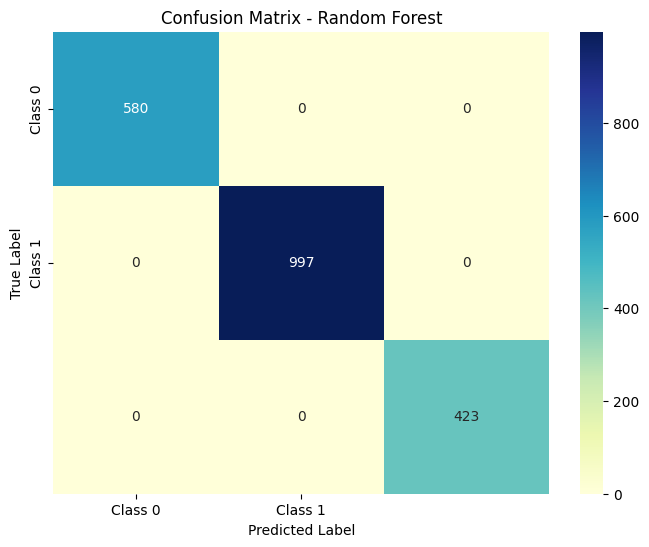

In [ ]:
# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

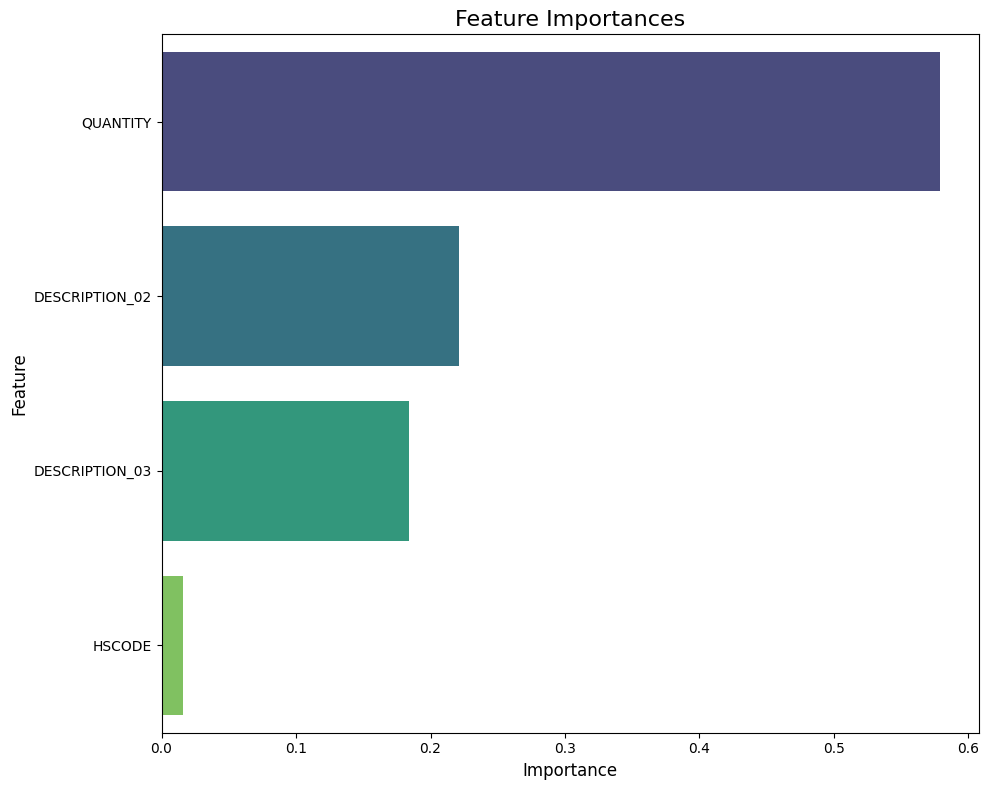

In [ ]:
# Extracting the feature imprtance and arranging them in the descending order
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns[indices]

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=importances[indices], y=features, palette='viridis')

# Addding labels and title
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Displaying the plot
plt.show()

# **Model based on Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

Gradient Boosting Classifier Performance:
Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       997
           2       1.00      1.00      1.00       423

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Predict on the training and test sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
# Print the performance metrics
print("Gradient Boosting Classifier Performance:")
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Gradient Boosting Classifier Performance:
Training Accuracy: 1.00
Testing Accuracy: 1.00

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       580
           1       1.00      1.00      1.00       997
           2       1.00      1.00      1.00       423

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Checking for overfitting
train_accuracy_gb = accuracy_score(y_train, gb_model.predict(X_train))
test_accuracy_gb = accuracy_score(y_test, y_test_pred)
difference_gb = train_accuracy_gb - test_accuracy_gb

print("Gradient Boosting Overfitting Check:")
print(f"Training Accuracy: {train_accuracy_gb:.2f}")
print(f"Test Accuracy: {test_accuracy_gb:.2f}")
print(f"Difference (Train - Test): {difference_gb:.2f}")

Gradient Boosting Overfitting Check:
Training Accuracy: 1.00
Test Accuracy: 1.00
Difference (Train - Test): 0.00


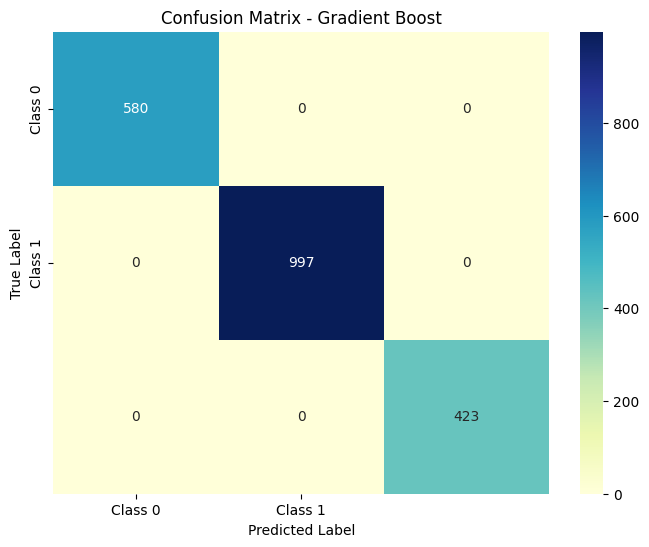

In [ ]:
# Confusion Matrix for Gradient Boost Model
cm_gb = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Confusion Matrix - Gradient Boost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Ensure the plot is displayed
plt.show()

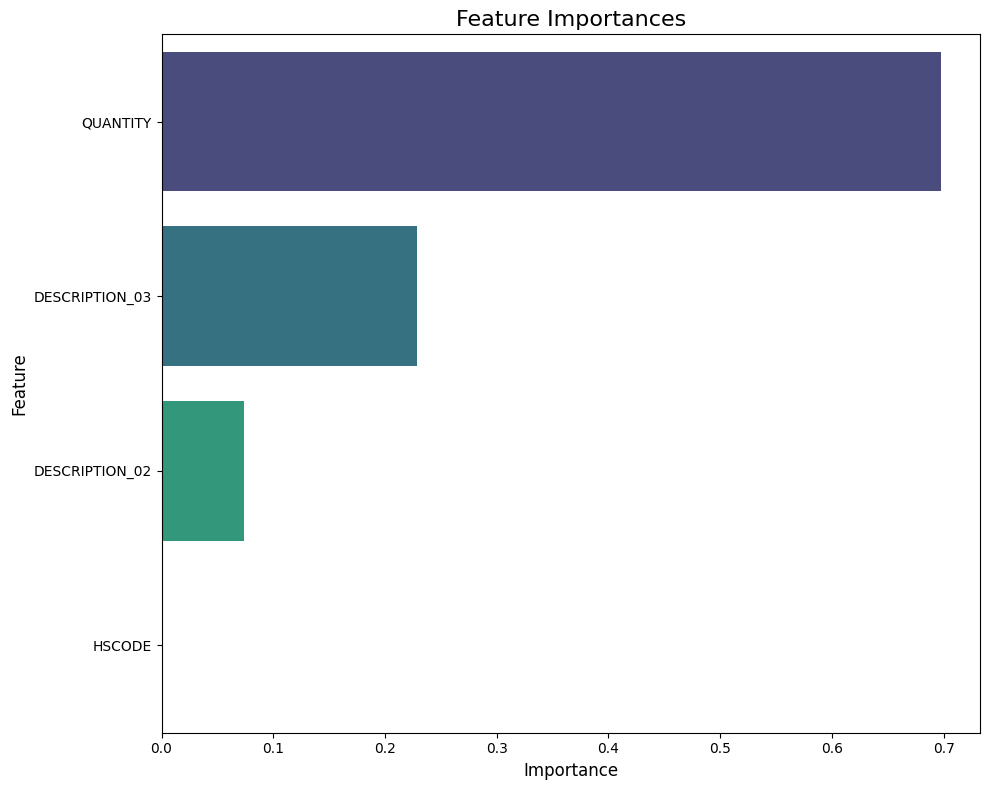

In [ ]:
# Feature Importance
feature_importances = gb_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
feature_names = X_train.columns[sorted_idx]

# Plotting the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names, palette='viridis')

# Adding labels and title
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()

# Displaying the plot
plt.show()